In [2]:
import numpy as np
from numba import jit
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

In [3]:
image_counter = 30

def save_image(fig):
    global image_counter
    filename = "mandelbrodt_%d.png" % image_counter
    image_counter += 1
    fig.savefig(filename)

In [20]:
def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=80,cmap='jet',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    ax.set_title(cmap)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm)  
    
    save_image(fig)

In [24]:
@jit
def mandelbrot(z,maxiter,horizon,log_horizon):
    c = z
    for n in range(maxiter):
        az = abs(z)
        if az > horizon:
            return n - np.log(np.log(az))/np.log(2) + log_horizon
        z = z*z + c
    return 0

@jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter,horizon, log_horizon)
    return (r1,r2,n3)

@jit
def min_max(x,y,width,height):
    return x-(width/2), x+(width/2), y-(height/2), y+(height/2)

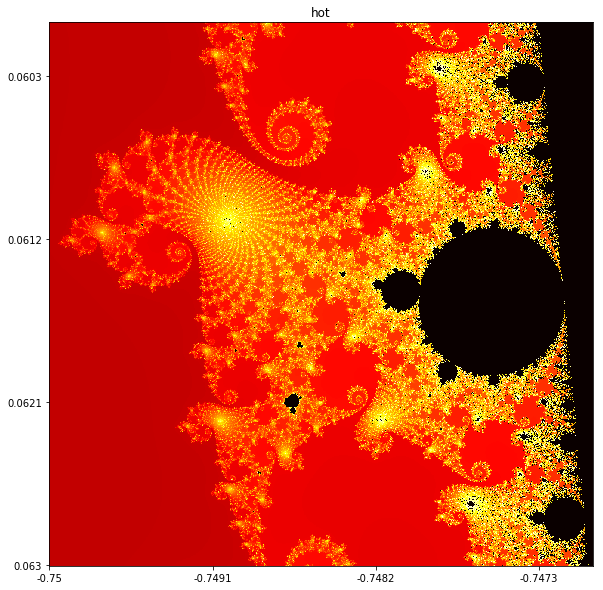

In [25]:
mandelbrot_image(-0.75,-0.747,0.063,0.06,cmap='hot',maxiter=4096)

In [9]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,0,'Areas')

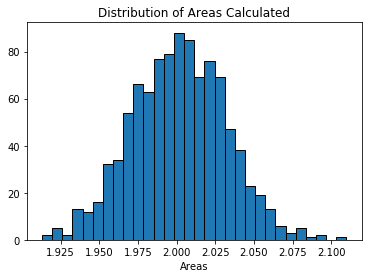

In [16]:
a = 0
b = np.pi #limits of integration
N = 1000

def func(x):
    return np.sin(x)

areas = []

for i in range(N):
    xrand = np.random.uniform(a,b,N)
    integral = 0.0

    for i in range(N):
        integral += func(xrand[i])

    areas.append((b-a)/float(N)*integral)

plt.title("Distribution of Areas Calculated")
plt.hist(areas,bins=30, ec="black")
plt.xlabel("Areas")

In [ ]:
@jit
def mandelbrot(z,maxiter,horizon,log_horizon):
    c = z
    for n in range(maxiter):
        az = abs(z)
        if az > horizon:
            return n - np.log(np.log(az))/np.log(2) + log_horizon
        z = z*z + c
    return 0

@jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter,horizon, log_horizon)
    return (r1,r2,n3)

areas = []

for i in range(N):
    xrand = np.random.uniform(a,b,N)
    integral = 0.0

    for i in range(N):
        integral += func(xrand[i])

    areas.append((b-a)/float(N)*integral)

plt.title("Distribution of Areas Calculated")
plt.hist(areas,bins=30, ec="black")
plt.xlabel("Areas")